<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/4_MonteCarlo.ipynb)

<a id="contenido"></a>
<h1><center>Contenido | Módulo 2</center><h1>
    
---
* [Introducción a los métodos de Monte Carlo con Python](#a)   
* [Monte Carlo Estacionario](#b)

<a id="a"></a>
<h1><center>2.10. Introducción - Monte Carlo</center></h1>

[Regreso a contenido](#contenido)

---
![alt text](https://thumbs.gfycat.com/PeriodicTangibleBushbaby-size_restricted.gif)


![alt text](https://steemitimages.com/p/2bP4pJr4wVimqCWjYimXJe2cnCgn5DUA6MvX91E58ut?format=match&mode=fit&width=640)

Los métodos de Monte Carlo (MC) son un subconjunto de algoritmos computacionales que utilizan el proceso de muestreo aleatorio repetido para realizar estimaciones numéricas de parámetros desconocidos. 

---

Permiten modelar situaciones complejas en las que intervienen muchas variables aleatorias y evaluar el impacto del riesgo. 

Los usos de MC son increíblemente amplios y han llevado a una serie de descubrimientos revolucionarios en los campos de la física, la teoría de juegos y las finanzas, entre otros muchos.... 

Existe un amplio espectro de métodos de Monte Carlo, pero todos comparten el rasgo común de que se basan en la generación de números aleatorios para resolver problemas deterministas. Espero esbozar algunos de los principios básicos de MC, y tal vez compartirles un poco de la emoción que tengo sobre sus posibles aplicaciones.

**NOTA: El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen.**

![img](https://i.imgur.com/EGbQfMo.gif)

Si quisiéramos encontrar la probabilidad de obtener blackjack (un as junto con una carta de valor diez), podríamos simplemente contar el número de manos posibles donde este es el caso y dividir por el número total de combinaciones posibles de cartas para obtener la probabilidad (es alrededor de 1/21, si tiene curiosidad). 

---

Pero ahora imagine que nuestro espacio muestral es mucho más difícil de calcular, por ejemplo, nuestra baraja de cartas tiene miles en lugar de solo 52 cartas, o mejor aún, ni siquiera sabemos cuántas cartas hay. Hay otra forma de encontrar esta probabilidad.

![img](https://media2.giphy.com/media/l2Sq2mPVJr4tfk436/giphy.gif)


Podríamos acomodarnos en la mesa y jugar cien juegos, registrando los resultados mientras jugamos. 

Podríamos obtener un blackjack 19, 20 o incluso 28 veces, y asignar la probabilidad usando cualquiera de esos valores. Parece una forma bastante mala de evaluar nuestras probabilidades en el casino, pero es de esperar que solo estemos jugando por diversión. Ahora, si vamos de nuevo y jugamos mil, diez mil, millones de veces, la [Ley de los Números Grandes](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros) establece:

**A medida que aumenta el número de variables generadas aleatoriamente distribuidas de manera idéntica, su media (promedio) se aproxima a su media teórica.**

Además de ser fácilmente una de las leyes de la estadística más importantes, esta es la base para las simulaciones de Monte Carlo y nos permite construir un modelo estocástico mediante el método de ensayos estadísticos. Veamos mi ejemplo favorito (y probablemente el más simple) de una estimación de [MC](https://www.statisticshowto.com/monte-carlo-simulation/).

## Números aleatorios en Python
---
En Python el módulo random nos proporciona un rápido generador de números pseudoaleatorios basado en el **[algoritmo Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)**; el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

In [2]:
# Utilizando random para genera números aleatorios.
import random

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

## Estimación Monte Carlo de Pi

Como a todos nos enseñan en geometría de la escuela.... **pi** es una constante que representa la relación entre la circunferencia y el diámetro de un círculo. Es irracional, lo que significa que tiene infinitos dígitos que no siguen ningún patrón. ¿Me creerías si te dijera que podemos estimar pi en tantos dígitos como queramos simplemente jugando a los dardos? Con cierto grado de incertidumbre, por supuesto, ¡después de todo estamos jugando un juego de azar! Vamos a escribir un breve script de Python para ver cómo.

In [8]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

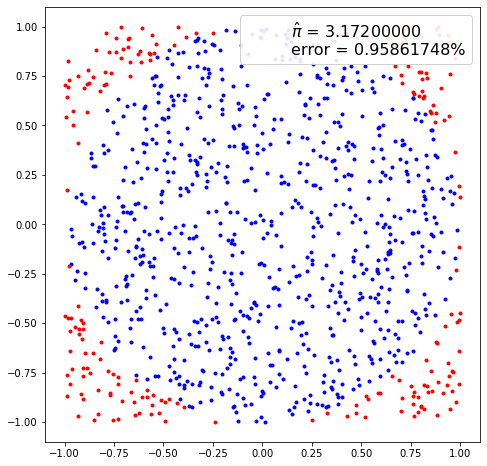

In [17]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

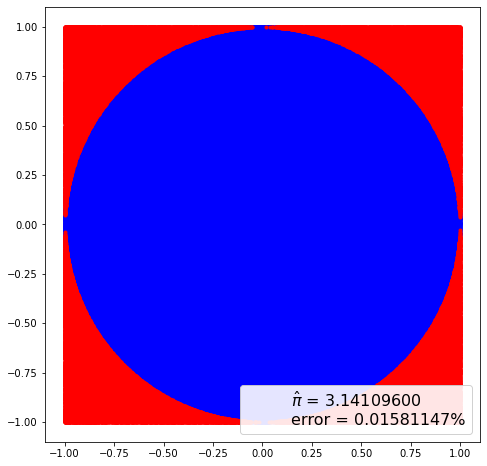

In [18]:
# con 1000000 experimentos
mc_pi_aprox(N=1000000)

### Ejemplo

Para este ejemplo, intentaremos predecir cuánto dinero deberíamos tener de presupuesto para dar comisiones de ventas para el próximo año. Este problema es útil para modelar porque tenemos una fórmula definida para calcular las comisiones y probablemente tengamos alguna experiencia con los pagos de comisiones de años anteriores.

Este problema también es importante desde una perspectiva **empresarial**. Las comisiones de venta pueden ser un gran gasto de venta y es importante planificar adecuadamente este gasto. 

---

Además, el uso de una simulación de Monte Carlo es una mejora relativamente simple que puede realizarse para aumentar lo que normalmente es un proceso de estimación poco sofisticado.

En este ejemplo, la comisión de ventas de muestra se vería así para una fuerza de ventas de 5 personas:

![img](https://pbpython.com/images/Excel_Table_1.png)

En este ejemplo, la comisión es el resultado de esta fórmula:

$$Monto de la comisión = Ventas reales * Tasa de comisión$$

La tasa de comisión se basa en esta tabla de Porcentaje para planificar:

![img](https://pbpython.com/images/Excel_Table_4.png)

Antes de construir un modelo y ejecutar la simulación, veamos un enfoque simple para predecir el gasto de comisión del próximo año.

### Enfoque ingenuo del problema

Imagine que su tarea como analista es decirle a los de finanzas cuánto presupuestar para las comisiones de ventas para el próximo año. Un enfoque podría ser asumir que todos obtienen el 100% de su objetivo y ganan la tasa de comisión del 4%. Conectar estos valores en Excel produce esto:

![img](https://pbpython.com/images/Excel_Table_2.png)

Imagínemos que presenta esto al de finanzas y ellos dicen: *Nunca todos obtienen la misma tasa de comisión. Necesitamos un modelo más preciso*.

Para la segunda ronda, puede probar un par de rangos:

![img](https://pbpython.com/images/Excel_Table_6.png)

Ahora, **tenemos** un poco más de información y volvemos con el experto... Esta vez dicen: "*este rango es útil, pero ¿cuál es su confianza en este rango? Además, necesitamos que haga esto para una fuerza de ventas de 500 personas y modele varias tarifas diferentes para determinar la cantidad a presupuestar*". Hmmm ... Ahora, ¿qué haces?


----


Este enfoque simple ilustra el método iterativo básico para una simulación de Monte Carlo. Repite este proceso muchas veces para determinar un rango de posibles valores de comisión para el año. Hacer esto manualmente ... es un desafío. Afortunadamente, Python simplifica mucho este enfoque.

<a id="b"></a>
<h1><center>2.11. Monte Carlo Estacionario</center></h1>

[Regreso a contenido](#contenido)

---

Ahora que hemos cubierto el problema a un alto nivel, podemos discutir cómo el análisis de Monte Carlo podría ser una herramienta útil para predecir los gastos de comisiones para el próximo año. En su nivel más simple, un análisis (o simulación) de Monte Carlo implica ejecutar muchos escenarios con diferentes entradas aleatorias y resumir la distribución de los resultados.

Usando el análisis de comisiones, podemos continuar el proceso manual que comenzamos anteriormente, pero ejecutamos el programa cientos o incluso miles de veces y obtendremos una distribución de los montos de comisiones potenciales. 

Esta distribución puede informar la probabilidad de que el gasto esté dentro de una ventana determinada. Al final del día, esta es una predicción, por lo que probablemente nunca la predeciremos con exactitud. Podemos desarrollar una idea más informada sobre el riesgo potencial de un presupuesto excesivo o insuficiente.

------------

Hay dos componentes para ejecutar una simulación de Monte Carlo:

  * la ecuación para evaluar
  * las variables aleatorias para la entrada

Ya hemos descrito la ecuación anterior. Ahora debemos pensar en cómo poblar las variables aleatorias.

Un enfoque simple sería tomar un número aleatorio entre 0% y 200% (que representa nuestra intuición sobre las tasas de comisiones). Sin embargo, debido a que pagamos comisiones todos los años, entendemos nuestro problema con un poco más de detalle y podemos usar ese conocimiento previo para construir un modelo más preciso.

Debido a que hemos pagado comisiones durante varios años, podemos observar una distribución histórica típica del porcentaje al objetivo:

![img](https://pbpython.com/images/monte_carlo_image_hist_pct.png)

### Construyendo el modelo... en Python

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Para este modelo, usaremos una generación de números aleatorios de numpy. El aspecto útil de numpy es que hay varios generadores de números aleatorios que pueden crear muestras aleatorias basadas en una distribución predefinida.

Como se describió anteriormente, sabemos que nuestro porcentaje histórico de rendimiento objetivo se centra en una media del 100% y una desviación estándar del 10%. Definamos esas variables, así como la cantidad de representantes de ventas y simulaciones que estamos modelando:

In [20]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [23]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(4)

In [24]:
pct_to_target

array([1.0145, 0.7029, 0.8708, 0.9586, 1.0625, 1.0308, 1.0565, 0.9291,
       1.1319, 1.0619, 1.0087, 0.9592, 0.8191, 0.9555, 0.8941, 1.0004,
       1.1676, 0.889 , 0.9273, 0.968 , 0.9246, 1.102 , 1.0194, 1.1473,
       1.0991, 1.0047, 1.1236, 0.922 , 0.988 , 0.9453, 0.8871, 0.9776,
       1.021 , 0.9849, 0.8628, 1.025 , 0.9737, 0.9486, 1.037 , 1.071 ,
       1.0701, 0.9375, 0.8297, 1.1307, 0.9122, 0.8452, 0.8668, 0.9177,
       0.9853, 0.9922, 1.0498, 0.901 , 1.1901, 0.9181, 1.0057, 1.0068,
       1.0909, 1.0846, 1.0489, 1.0593, 1.1967, 0.9499, 0.7266, 0.892 ,
       0.9937, 1.011 , 0.8868, 0.9823, 0.8738, 1.0827, 0.8696, 1.0798,
       1.1226, 0.7965, 0.9104, 1.1104, 1.0182, 0.8315, 1.0203, 0.9925,
       0.9711, 1.156 , 1.1287, 1.2836, 0.9346, 0.8619, 1.0439, 1.0269,
       0.9557, 0.8463, 1.0684, 1.0135, 1.0026, 1.2325, 1.0776, 1.0833,
       1.0871, 1.1415, 1.019 , 0.9746, 1.1785, 0.9421, 0.8805, 0.9545,
       0.9519, 1.1749, 0.9345, 0.7004, 0.9133, 1.1454, 1.0066, 1.1398,
      

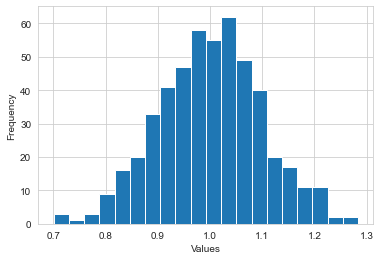

In [26]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(pct_to_target, 20)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Dado que estamos tratando de hacer una mejora en nuestro enfoque simple, vamos a seguir con una distribución normal para el porcentaje objetivo. Sin embargo, al usar numpy, podemos ajustar y usar otra distribución para modelos futuros si es necesario....

Hay otro valor que debemos simular y es el objetivo de ventas real. Para ilustrar una distribución diferente, asumiremos que nuestra distribución objetivo de ventas se parece a esto:

![img](https://pbpython.com/images/monte_carlo_sales_target.png)

[numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [34]:
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

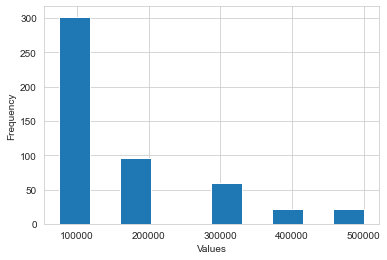

In [35]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(sales_target, 10)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

In [29]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [30]:
df

,Pct_To_Target,Sales_Target,Sales
0,1.0145,75000,76087.5
1,0.7029,500000,351450.0
2,0.8708,100000,87080.0
3,0.9586,100000,95860.0
4,1.0625,100000,106250.0
...,...,...,...
495,1.0705,100000,107050.0
496,0.9666,300000,289980.0
497,0.8907,400000,356280.0
498,1.0217,75000,76627.5


Puede notar que hice un pequeño truco para calcular el monto real de las ventas. Para este problema, la cantidad real de ventas puede cambiar mucho a lo largo de los años, pero la distribución del rendimiento sigue siendo notablemente constante. Por lo tanto, estoy usando las distribuciones aleatorias para generar mis entradas y respaldar las ventas reales.

La última pieza de código que necesitamos crear es una forma de asignar nuestro Pct_To_Target a la tasa de comisión. Aquí está la función:



In [36]:
def calc_commission_rate(x):
    """ Con base a la tabla de comisiones:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

El beneficio adicional de usar Python en lugar de Excel es que podemos crear una lógica mucho más compleja que es más fácil de entender que si intentáramos construir una declaración if anidada compleja en Excel.

Ahora creamos nuestra tasa de comisión y la multiplicamos por las ventas:

In [37]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [39]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.0145,75000,76087.5,0.04,3043.5
1,0.7029,500000,351450.0,0.02,7029.0
2,0.8708,100000,87080.0,0.02,1741.6
3,0.9586,100000,95860.0,0.03,2875.8
4,1.0625,100000,106250.0,0.04,4250.0


¡Ahí está!

Hemos replicado un modelo que es similar a lo que hubiéramos hecho en Excel, pero usamos algunas distribuciones más sofisticadas que simplemente arrojar un montón de entradas de números aleatorios al problema.

Si sumamos los valores (solo los 5 primeros se muestran arriba) en la columna Commission_Amount, podemos ver que esta simulación muestra que pagaríamos de...

In [41]:
df['Commission_Amount'].sum().round(2)

2828971.68

### Hagamos más repeticiones...

La verdadera *magia* de la simulación de Monte Carlo es que si ejecutamos una simulación muchas veces, comenzamos a desarrollar una imagen de la distribución probable de los resultados.

Además de ejecutar cada simulación, guardamos los resultados que nos interesan en una lista que convertiremos en un **dataframe** para un análisis más detallado de la distribución de resultados.

Aquí el código...



In [42]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []

# Podemos fijar el número de iteraciones...
for i in range(num_simulations):

    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [43]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [48]:
results_df.describe().round(2).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,703,869.75","2,859,498.43","83,692,100.0"
std,"2,634,673.54","99,550.06","2,599,131.22"
min,"74,324,500.0","2,517,905.0","74,675,000.0"
25%,"81,881,750.0","2,791,040.0","81,950,000.0"
50%,"83,693,625.0","2,858,439.0","83,625,000.0"
75%,"85,547,125.0","2,927,888.75","85,481,250.0"
max,"91,477,250.0","3,165,508.0","91,200,000.0"


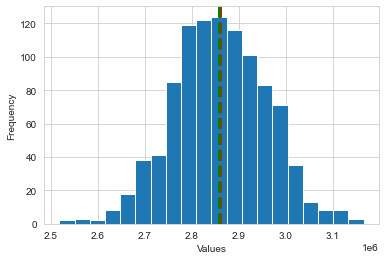

In [56]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Aquí radica uno de los beneficios de la simulación de Monte Carlo. 

Desarrolla una mejor comprensión de la distribución de resultados probables y puede utilizar ese conocimiento para hacer una estimación informada.

El otro valor de este modelo es que puede modelar muchas suposiciones diferentes y ver qué sucede.

# Reto !

A continuación, se muestran algunos cambios simples que puede realizar para ver cómo cambian los resultados:

  *  Aumente la tasa de comisión máxima al 5%
  *  Disminuir el número de vendedores.
  *  Cambiar la desviación estándar esperada a una cantidad mayor
  *  Modificar la distribución de objetivos



### Nota importante

* Una simulación de Monte Carlo es una herramienta útil para predecir resultados futuros al calcular una fórmula varias veces con diferentes entradas aleatorias. 

* Usar numpy y pandas para construir un modelo y generar múltiples resultados potenciales y analizarlos es relativamente sencillo. El otro beneficio adicional es que los analistas pueden ejecutar muchos escenarios cambiando las entradas y pueden pasar a modelos mucho más sofisticados en el futuro si surgen las necesidades. Finalmente, los resultados se pueden compartir con usuarios no técnicos y facilitar las discusiones en torno a la incertidumbre de los resultados finales.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_h12 = pd.read_excel('https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/data/h12.xls', skiprows=[0])  

In [ ]:
df_h12.head()

In [ ]:
df_h12['S_Calc'] = (df_h12['Sample']*df_h12['RSD'])/100

In [ ]:
df_h12.head()

In [ ]:
def PosNormal(df, mean_Head, std_Head, repetitions):
    test = pd.DataFrame()
    
    #Conversiones
    for k in range(8):
        val = np.array([1])
        for i in range(11):
            #print(i+(11*k))
            np.random.seed(i+(11*k))
            mu = df[mean_Head][k]
            sigma = df[std_Head][k]
            #np.random.randn(1000000) * sigma + mu
            s = abs(np.random.randn(repetitions) * sigma + mu)#, sigma, repetitions))
            #Corroborar si hay elementos negativos
            #np.concatenate((a, b), axis=0)
            val = np.concatenate((val,s), axis=0)
        #print(val[0])
        val = val[1:]
        test["Element"+str(k)] = val
        print("Element " + str(k))
        print(val.size)
        print(min(val))
        print(max(val))
        print(val.mean())
        print(val.std())
        print(val.std()/val.mean()*100)
        count, bins, ignored = plt.hist(val, 50, density=True)
        plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')

        plt.show()
    return test

In [ ]:
test = PosNormal(df_h12, 'Sample', 'S_Calc', 200)

In [ ]:
test.describe()

In [ ]:
test

# El algoritmo Metropolis-Hastings
---
Uno de los métodos MCMC más populares es el algoritmo Metropolis-Hastings; de hecho la mayoría de los algoritmos de MCMC pueden ser interpretados como casos especiales de este algoritmo. 

El algoritmo Metropolis-Hastings esta catalogado como uno de los 10 algoritmos más importantes y más utilizados en ciencia e ingeniería en los últimos veinte años.Se encuentra en el corazón de la mayoría de los métodos de muestreo [MCMC](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50). 

In [6]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

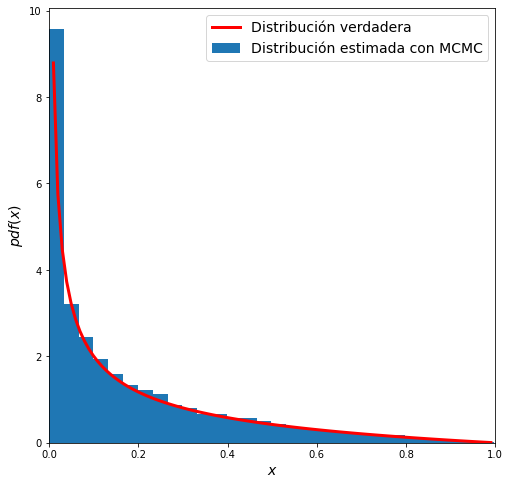

In [7]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

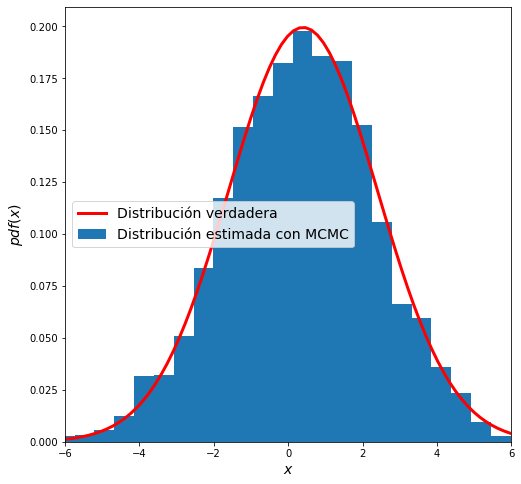

In [8]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

como vemos, las distribuciones estimadas utilizando MCMC se acercan bastante a las distribuciones reales.